In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [21]:
x = df
x = x.drop(columns=['Salary'], axis=1)
y = df.Salary


In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((22, 1), (8, 1), (22,), (8,))

In [23]:
x_train

,YearsExperience
17,5.3
22,7.9
5,2.9
16,5.1
8,3.2
14,4.5
23,8.2
20,6.8
1,1.3
29,10.5


<AxesSubplot: xlabel='YearsExperience', ylabel='Salary'>

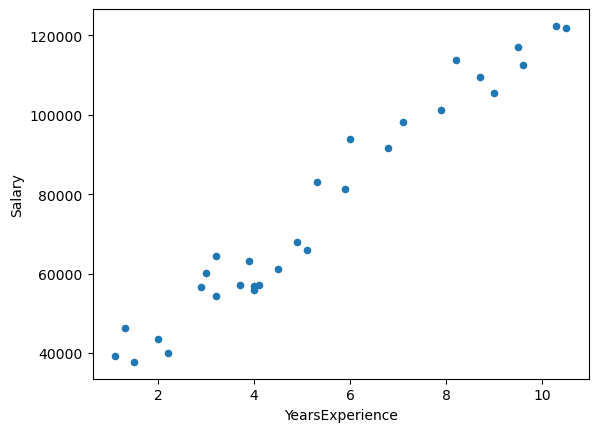

In [42]:
df.plot.scatter('YearsExperience', 'Salary')

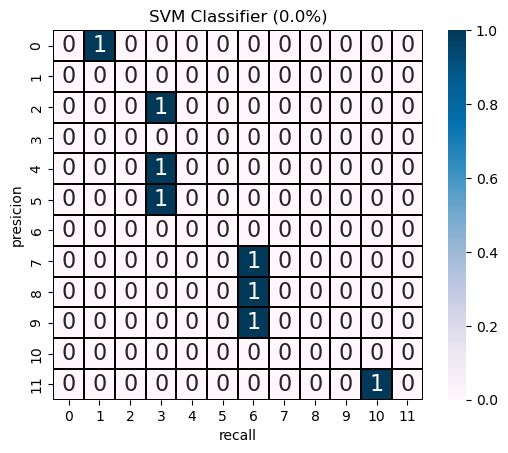

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

def estimate_model(model, name, x_test, y_test):
    pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    conf_matr = confusion_matrix(y_test, pred)
    colormap = plt.cm.PuBu
    plt.title(f"{name} ({accuracy*100:.1f}%)")
    sns.heatmap(conf_matr, linewidths = 0.1,
            square = True, cmap = colormap, linecolor = "black", annot = True, annot_kws = {"size" : 16, })

    plt.xlabel("recall")
    plt.ylabel("presicion")
    plt.show()
clf_svm = SVC(random_state=0)
clf_svm.fit(x_train, y_train)

estimate_model(clf_svm, "SVM Classifier", x_test, y_test)

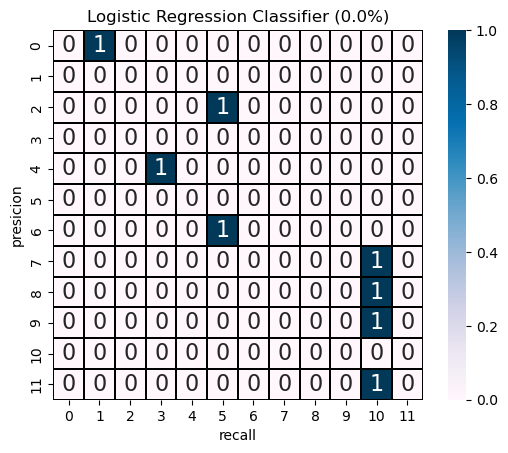

In [25]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(x_train, y_train)

estimate_model(clf_lr, "Logistic Regression Classifier", x_test, y_test)

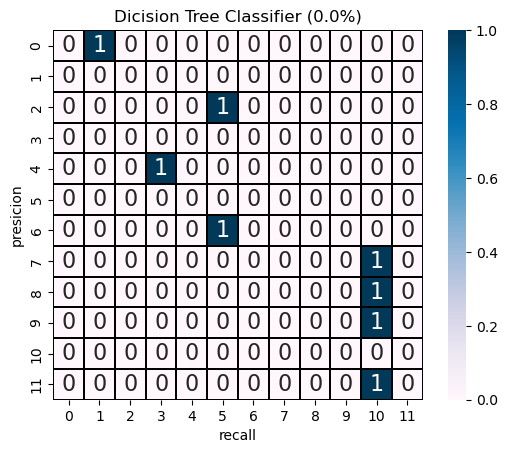

In [26]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(x_train, y_train)

estimate_model(clf_lr, "Dicision Tree Classifier", x_test, y_test)

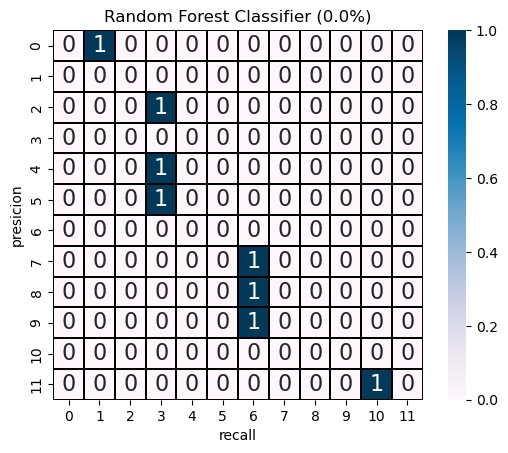

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(x_train, y_train)
estimate_model(rf_clf, "Random Forest Classifier", x_test, y_test)

In [34]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

print("가중치(계수, 기울기 파라미터 W) :", model.coef_[0])
print("편향(절편 파라미터 b) :", model.intercept_)

print(f"train 점수: {model.score(x_train.values, y_train)*100:.1f}%")
print(f"test 점수: {model.score(x_test.values, y_test)*100:.1f}%")

가중치(계수, 기울기 파라미터 W) : 9379.710491946016
편향(절편 파라미터 b) : 26986.691316737248
train 점수: 94.0%
test 점수: 97.8%


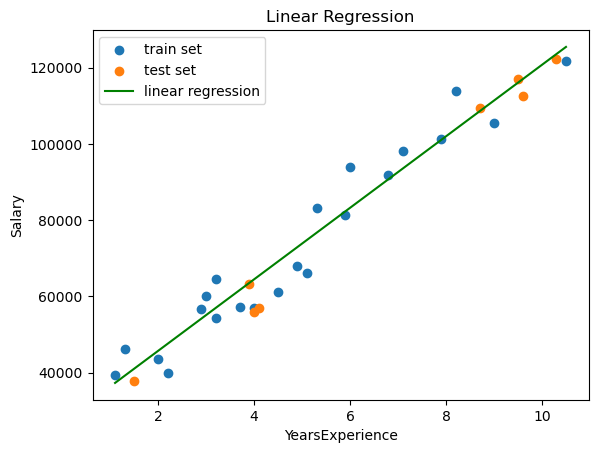

In [46]:
def f(x):
    return model.coef_[0] * x + model.intercept_
plt.scatter(x_train, y_train, label = 'train set')
plt.scatter(x_test, y_test, label = 'test set')
plt.plot(x, f(x), color='green', label= 'linear regression')
plt.title("Linear Regression")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.legend(loc="upper left")
plt.show()